In [1]:
import torch
from transformers import BertTokenizer, BertForSequenceClassification
from explainer import Archipelago
from application_utils.text_utils import *
from application_utils.text_utils_torch import BertWrapperTorch
from viz.text import viz_text

%load_ext autoreload
%autoreload 2
%matplotlib inline

## Get Model

In [2]:
device = torch.device("cuda:1")
tokenizer = BertTokenizer.from_pretrained('textattack/bert-base-uncased-snli')
model = BertForSequenceClassification.from_pretrained('textattack/bert-base-uncased-snli')
model_wrapper = BertWrapperTorch(model, device)

## Define Text

In [3]:
premise = "Your gift is appreciated by each and every student who will benefit from your generosity."	
hypothesis = "Hundreds of students will benefit from your generosity."
baseline_token = "_"

## Explain Prediction

In [7]:
text_inputs, baseline_ids = get_input_baseline_ids(premise,
                                                   baseline_token,
                                                   tokenizer,
                                                   text_pair=hypothesis)

xf = TextXformer(text_inputs, baseline_ids)
# [0: contradiction, 1: entailment, 2: neutral]
apgo = Archipelago(model_wrapper, data_xformer=xf, output_indices=2, batch_size=20)

In [23]:
explanation = apgo.explain(top_k=10)

### Show Explanation

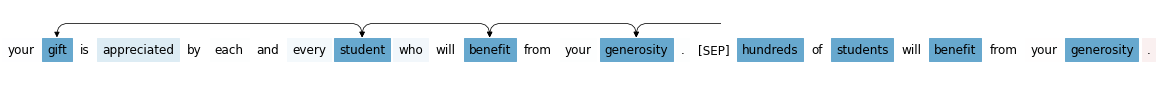

In [24]:
tokens = get_token_list(text_inputs['input_ids'], tokenizer)
explanation, tokens = process_stop_words(explanation, tokens)
fig = viz_text(explanation, tokens)

In [25]:
text_exp = {}
for k, v in explanation.items():
    text_exp[','.join([tokens[i-1] for i in k])] = v

text_exp


{'your': -0.036783516,
 'gift,student,benefit,generosity,hundreds,students,benefit,generosity': 3.6915984,
 'is': 0.0,
 'appreciated': 0.82391727,
 'by': 0.0,
 'each': 0.07975155,
 'and': 0.0,
 'every': 0.2851814,
 'who': 0.32123256,
 'will': 0.0,
 'from': 0.0,
 '.': -0.40235835,
 '[SEP]': 0.0,
 'of': 0.0}